In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import numpy as np

In [2]:
import os
import pandas as pd

# Path to the directory containing your CSV files
directory_path = '/home/danish/Datasets/ICS/binaryAllNaturalPlusNormalVsAttacks'
# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each CSV file and concatenate its data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path).dropna()
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Display the combined DataFrame
data = combined_df # .sample(frac=0.5, random_state=42)
data.shape
# Optionally, you can save the combined DataFrame to a new CSV file
# combined_df.to_csv('/path/to/combined_data.csv', index=False)

(78377, 129)

In [3]:
# List of bad or constant columns 
columns_to_drop = ['R3-PA:Z', 'R1-PA:Z', 'R2-PA:Z', 'R4-PA:Z', 'snort_log1', 'snort_log2', 'control_panel_log2', 'control_panel_log1']

# Remove specified columns
data = data.drop(columns=columns_to_drop)

In [4]:

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('/home/danish/Downloads/Datasets/ICS/binaryAllNaturalPlusNormalVsAttacks/data1.csv')
data.replace([np.inf, -np.inf], 1e15, inplace=True)
# data

# Extract the numerical columns for normalization
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols]
data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4:S,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log3,snort_log4,marker
0,-102.966245,135746.6838,137.062964,135721.6105,17.056954,135821.9036,-104.478854,558.66861,131.167228,587.78310,...,0.0,0,0,0,0,0,0,0,0,Natural
1,-110.357401,130180.4178,129.671808,130155.3446,9.665798,130230.5644,-113.348241,584.30401,122.549943,612.68606,...,0.0,0,0,0,0,0,0,0,0,Natural
2,-112.998736,127848.6037,127.036202,127823.5305,7.024463,127898.7503,-117.072466,601.33324,119.834123,623.67266,...,0.0,0,0,0,0,0,0,0,0,Natural
3,-113.949846,127898.7503,126.073633,127848.6037,6.061893,127948.8968,-118.831447,608.47453,118.762692,624.77132,...,0.0,0,0,0,0,0,0,0,0,Natural
4,-109.824550,131007.8358,130.193200,130982.7625,10.187190,131057.9823,-112.173677,485.60772,125.798614,496.96054,...,0.0,0,0,0,0,0,0,0,0,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,64.022304,131208.4219,-55.949329,131183.3486,-175.966798,131283.6417,61.403887,441.47821,-59.209459,442.39376,...,0.0,0,0,0,0,0,0,0,0,Natural
78373,63.965008,131233.4952,-56.012354,131183.3486,-176.018364,131308.7150,61.260647,441.66132,-59.352698,442.75998,...,0.0,0,0,0,0,0,0,0,0,Natural
78374,63.896253,131233.4952,-56.086839,131208.4219,-176.098578,131308.7150,61.008546,442.02754,-59.576152,443.49242,...,0.0,0,0,0,0,0,0,0,0,Natural
78375,63.879065,131233.4952,-56.098298,131208.4219,-176.110038,131308.7150,61.014276,442.94309,-59.616259,444.04175,...,0.0,0,0,0,0,0,0,0,0,Natural


In [5]:
data['marker'].value_counts()

marker
Attack     55663
Natural    22714
Name: count, dtype: int64

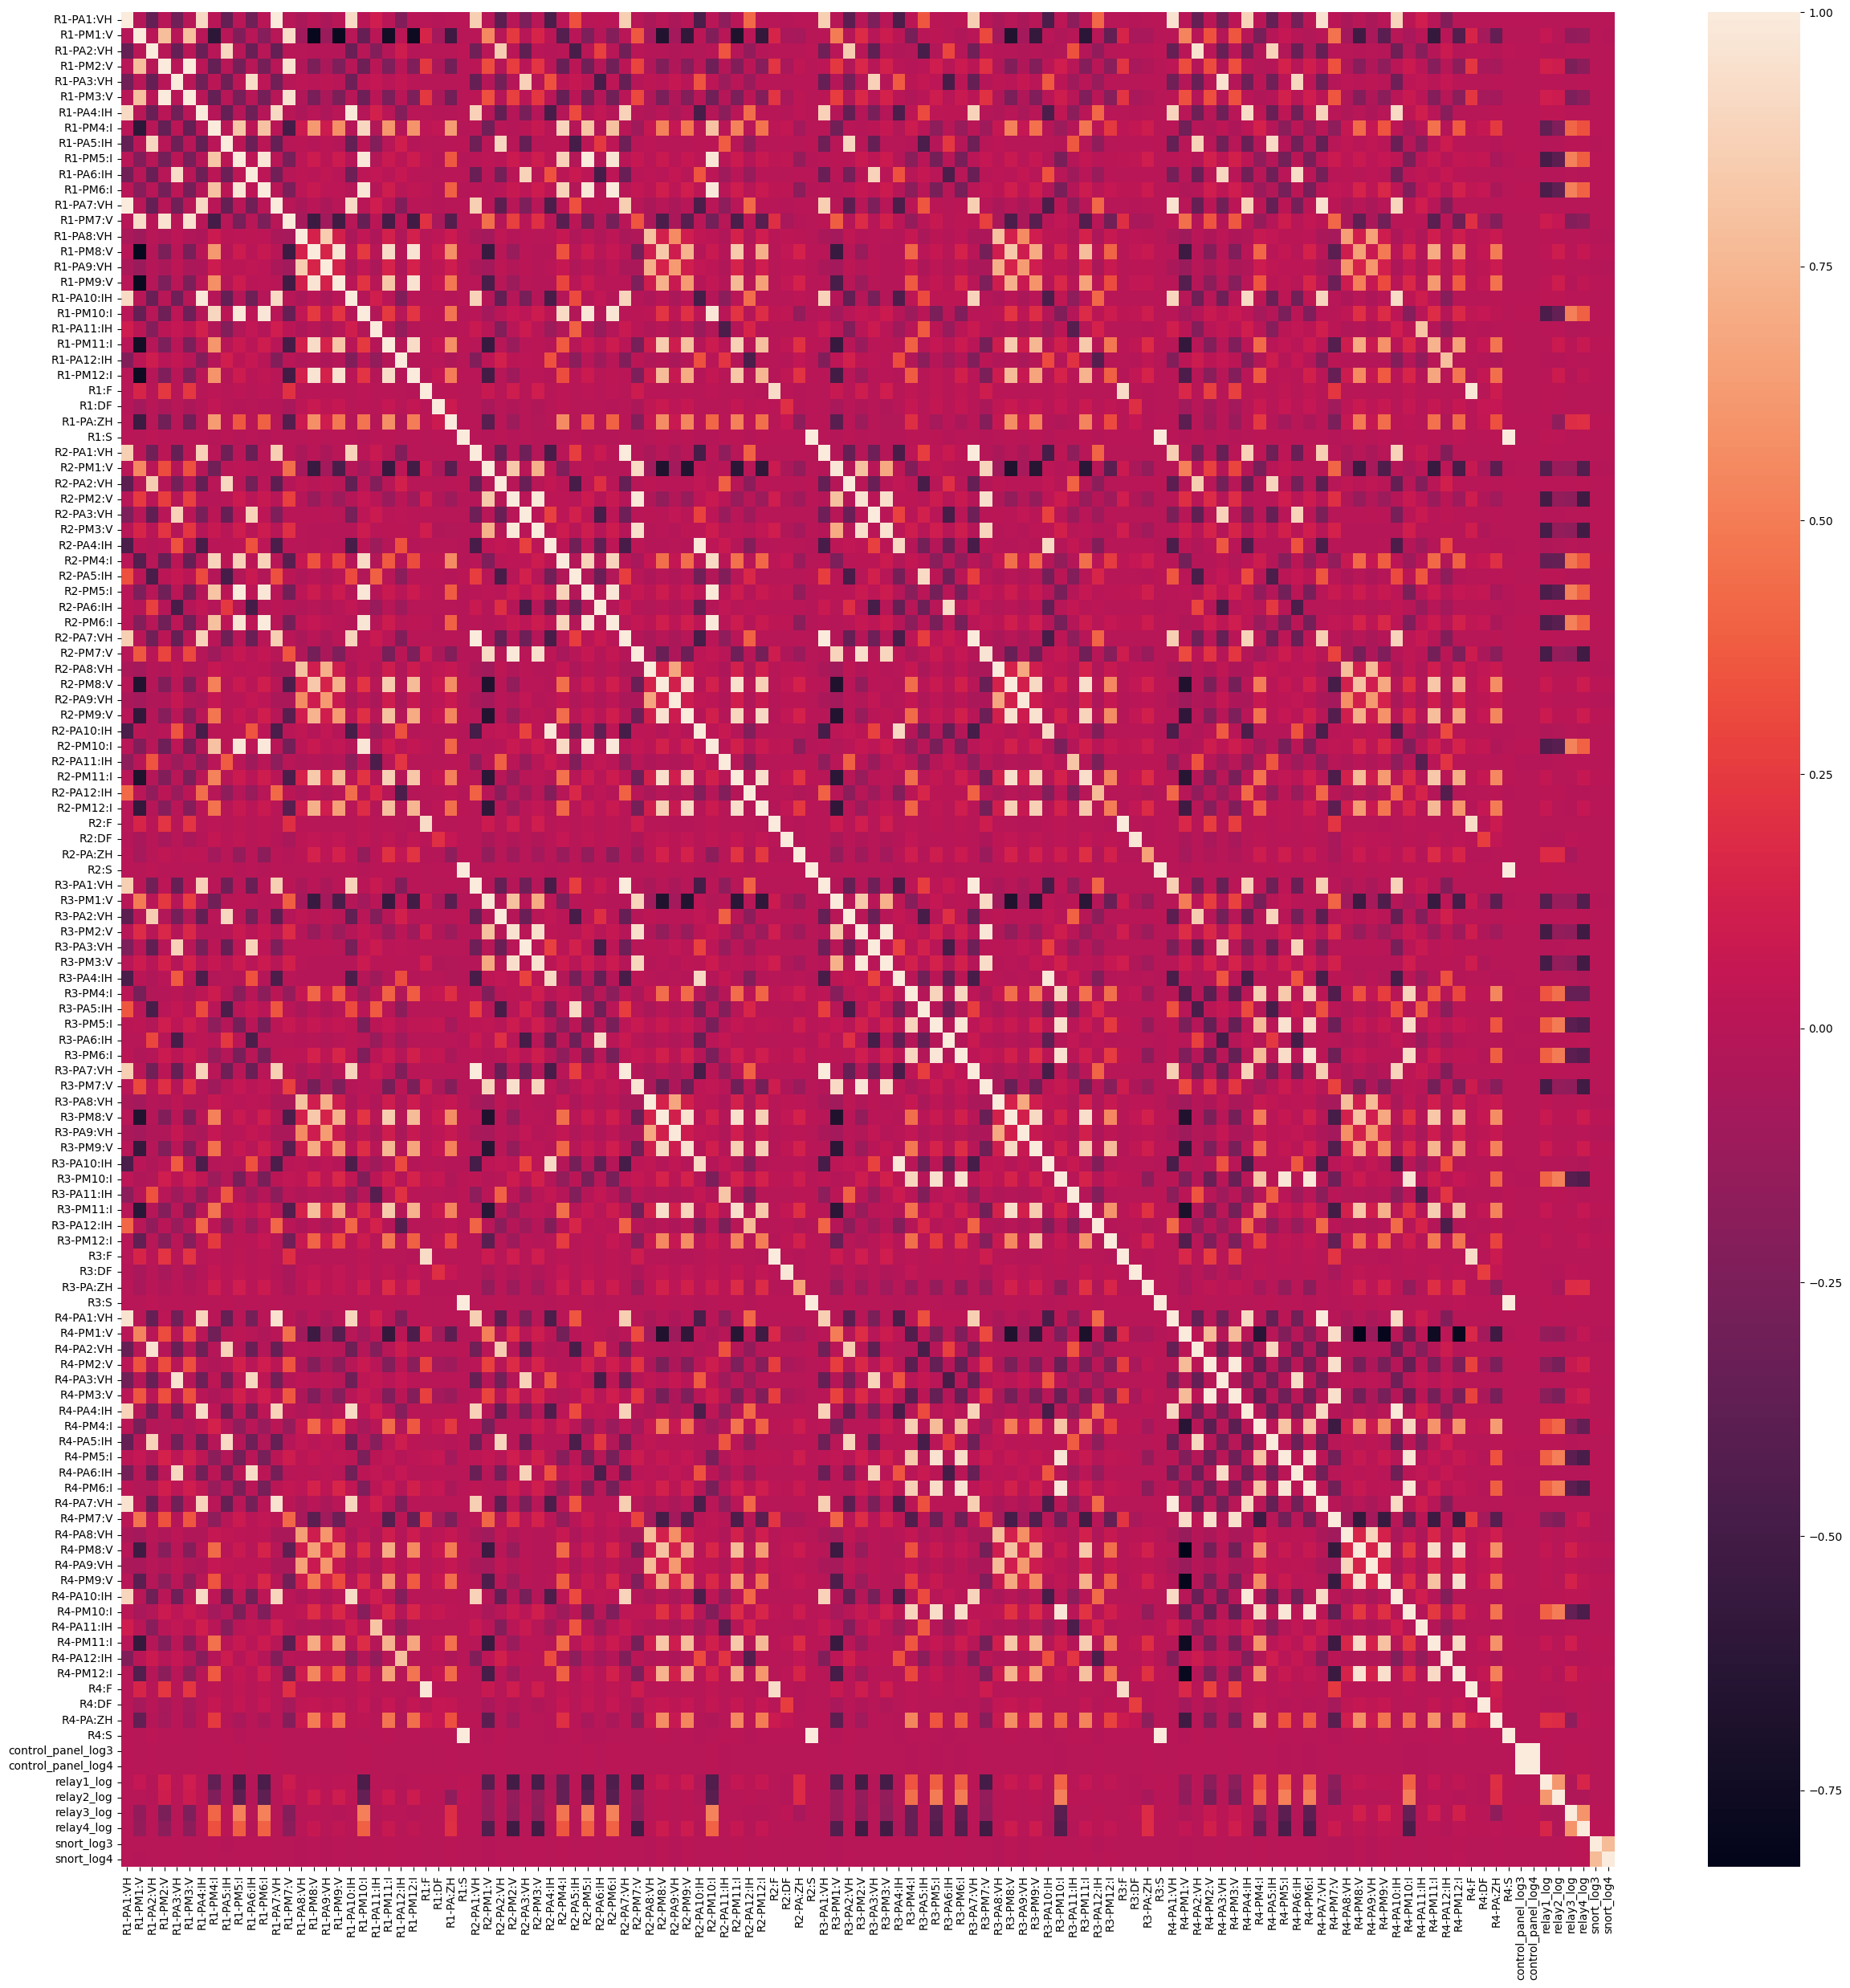

In [5]:

corr = pd.DataFrame(data.drop('marker', axis=1)).corr()

plt.figure(figsize=(30,30))

sns.heatmap(corr)

plt.show()

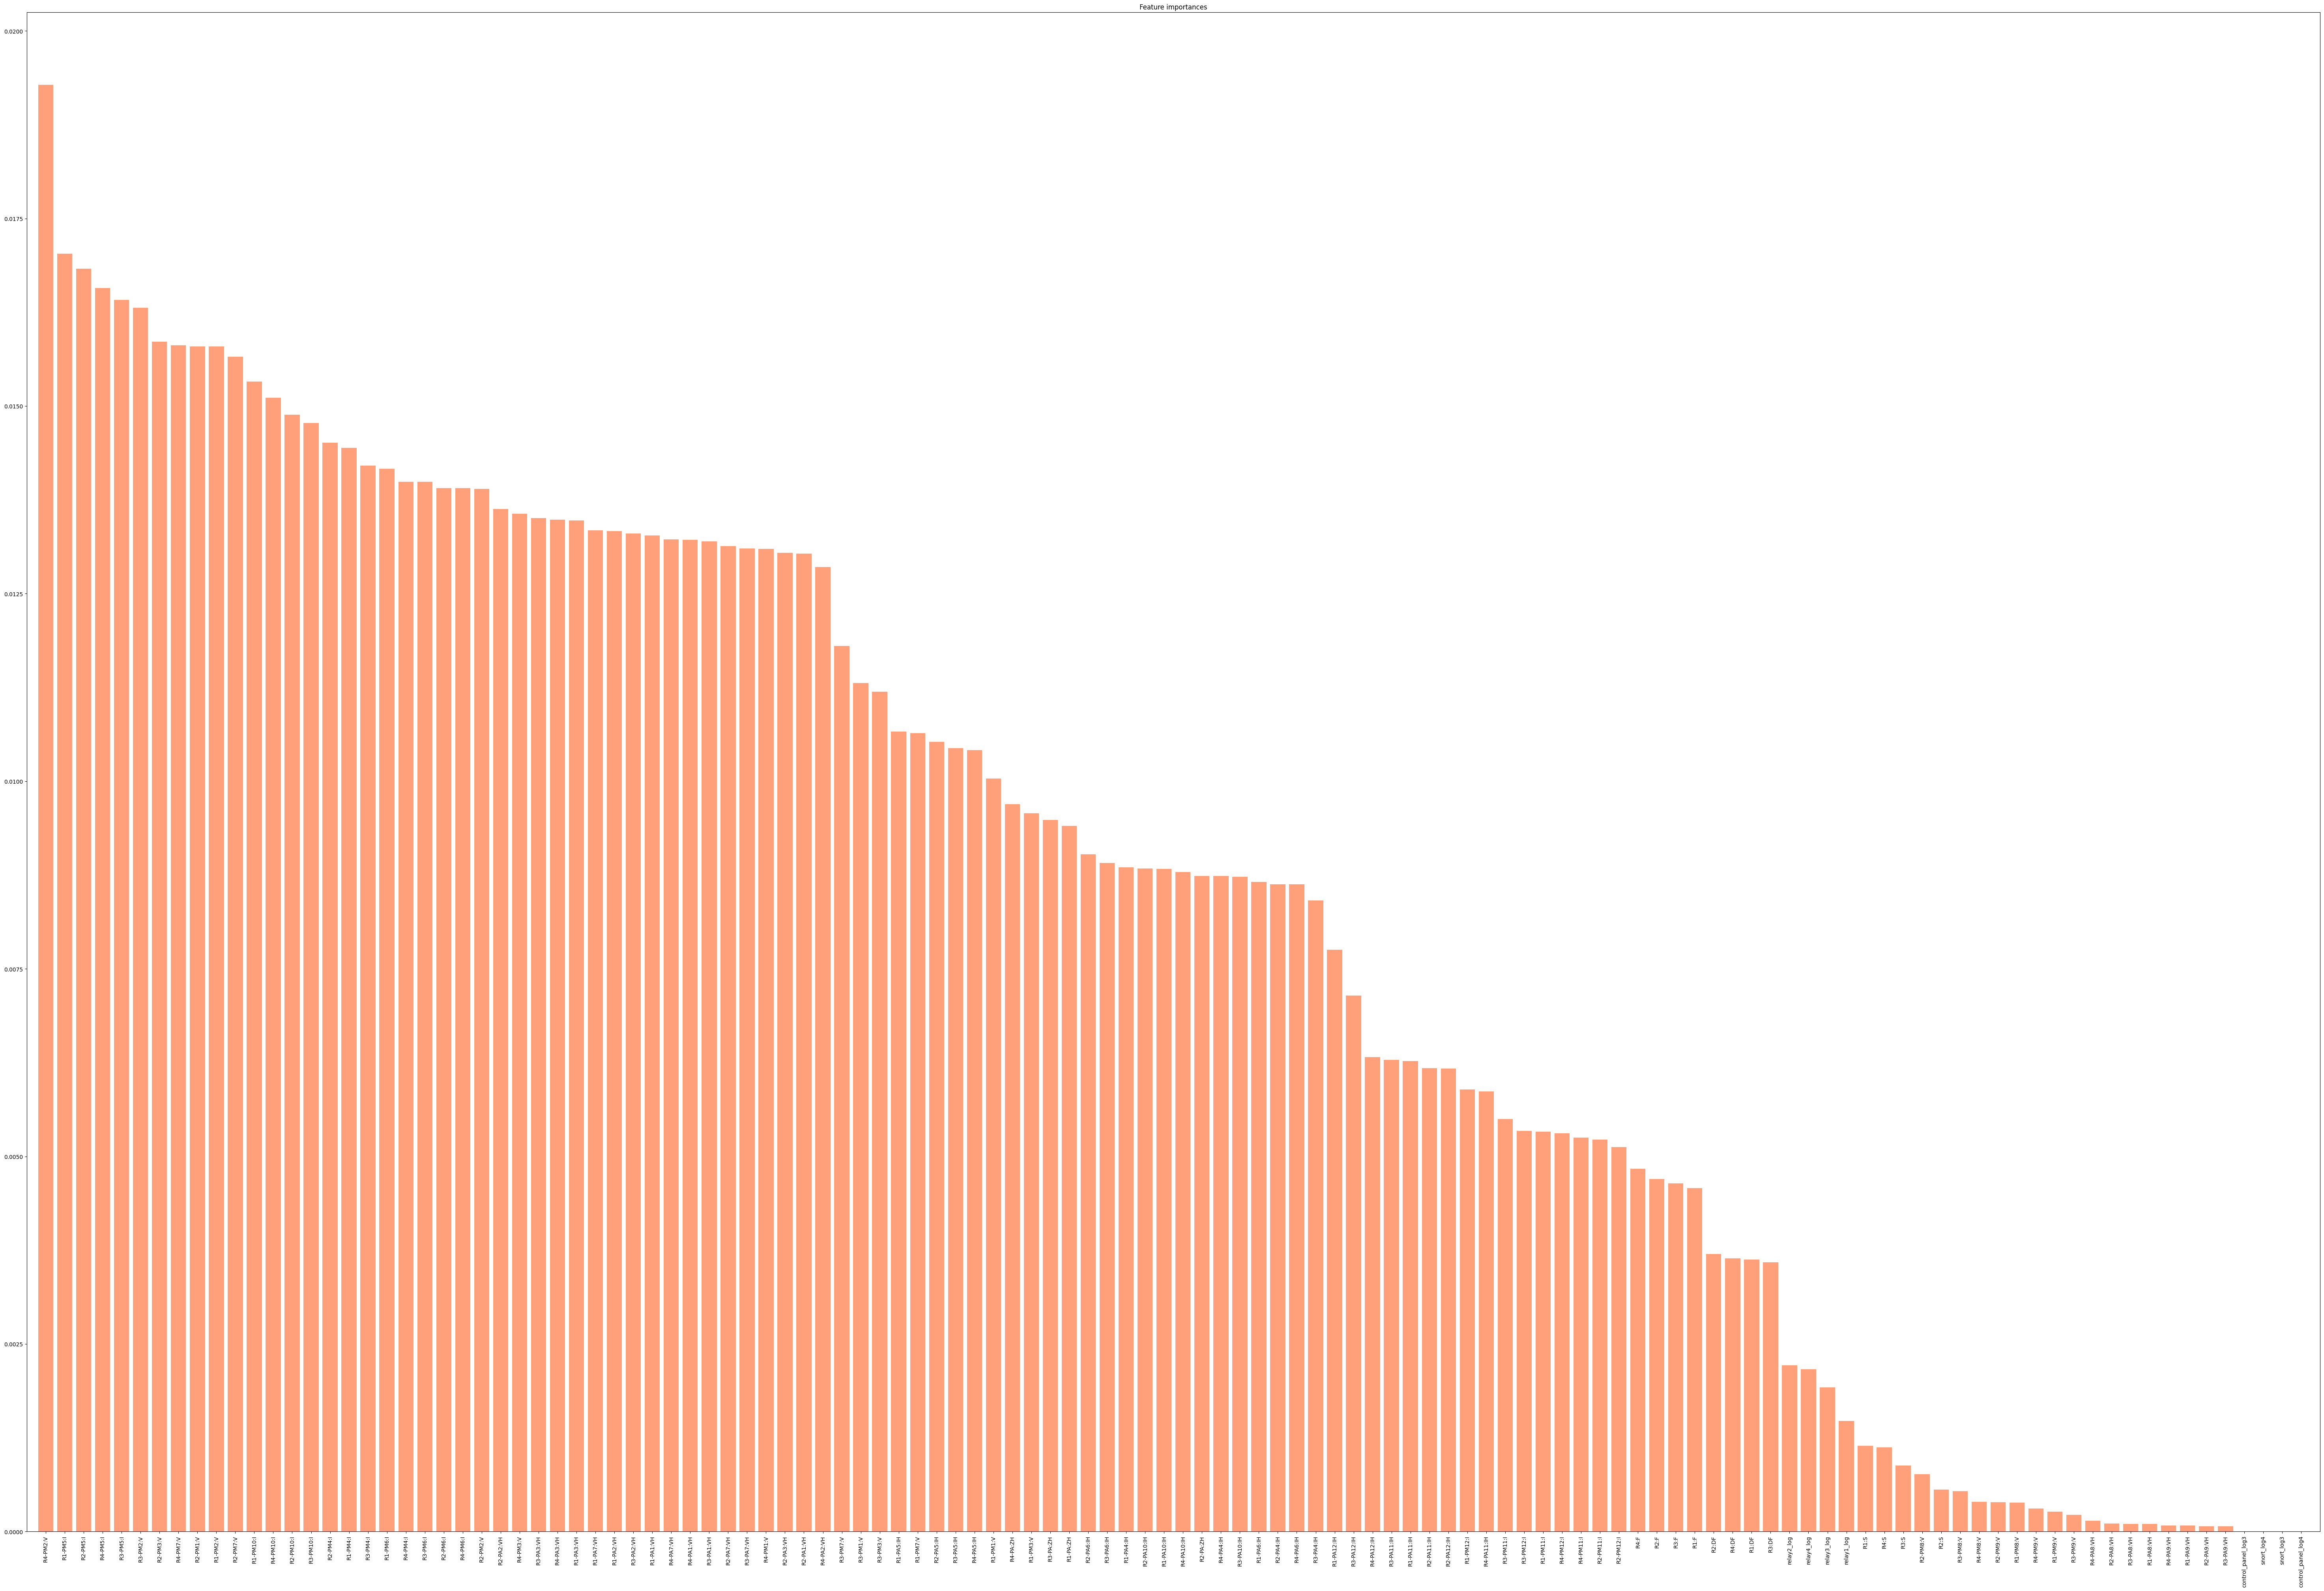

In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(data.drop('marker', axis=1), data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(data.drop('marker', axis=1).shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(data.drop('marker', axis=1).shape[1]), data.drop('marker', axis=1).columns[indices], rotation=90)
plt.xlim([-1, data.drop('marker', axis=1).shape[1]])
plt.show()

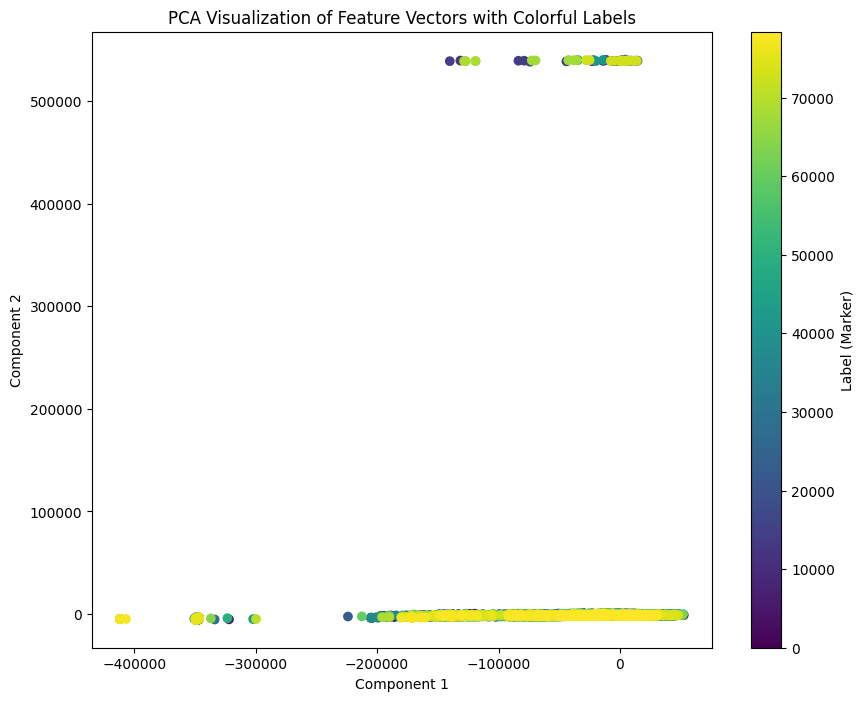

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


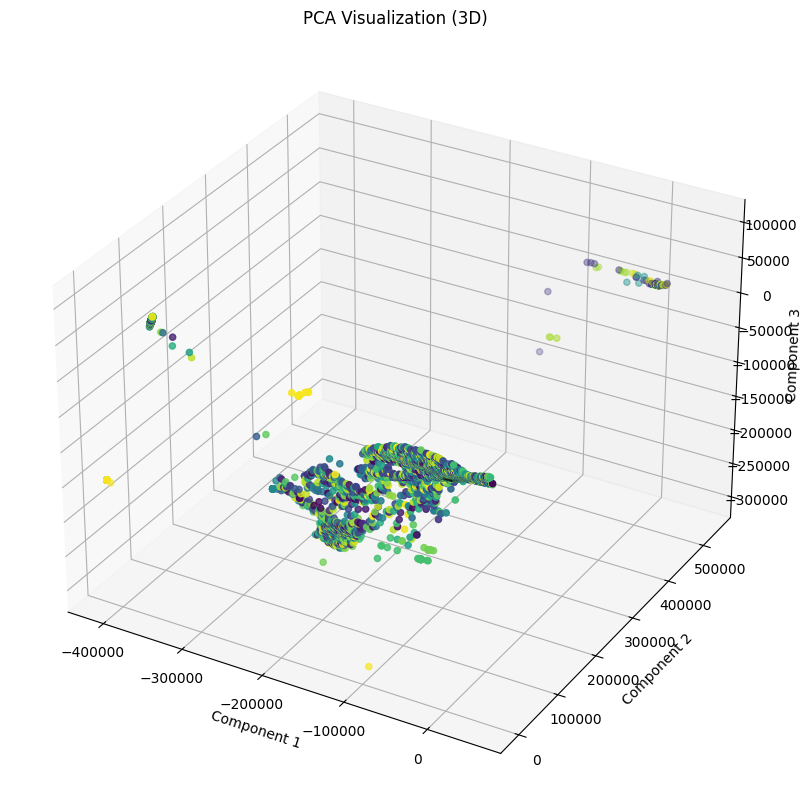

In [8]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [9]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)

# sfm = SelectFromModel(rf, threshold=0.00025)
sfm = SelectFromModel(et)
sfm.fit(data.drop('marker', axis=1), data['marker'].tolist())
# X_important_train = sfm.transform(X_train)
# X_important_test = sfm.transform(X_test)

feature_vector_1 = sfm.transform(data.drop('marker', axis=1))

# rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
# rf.fit(X_important_train, y_train)
# y_pred = rf.predict(X_important_test)
# print(classification_report(y_test, y_pred))
print(feature_vector_1.shape)




(78377, 68)


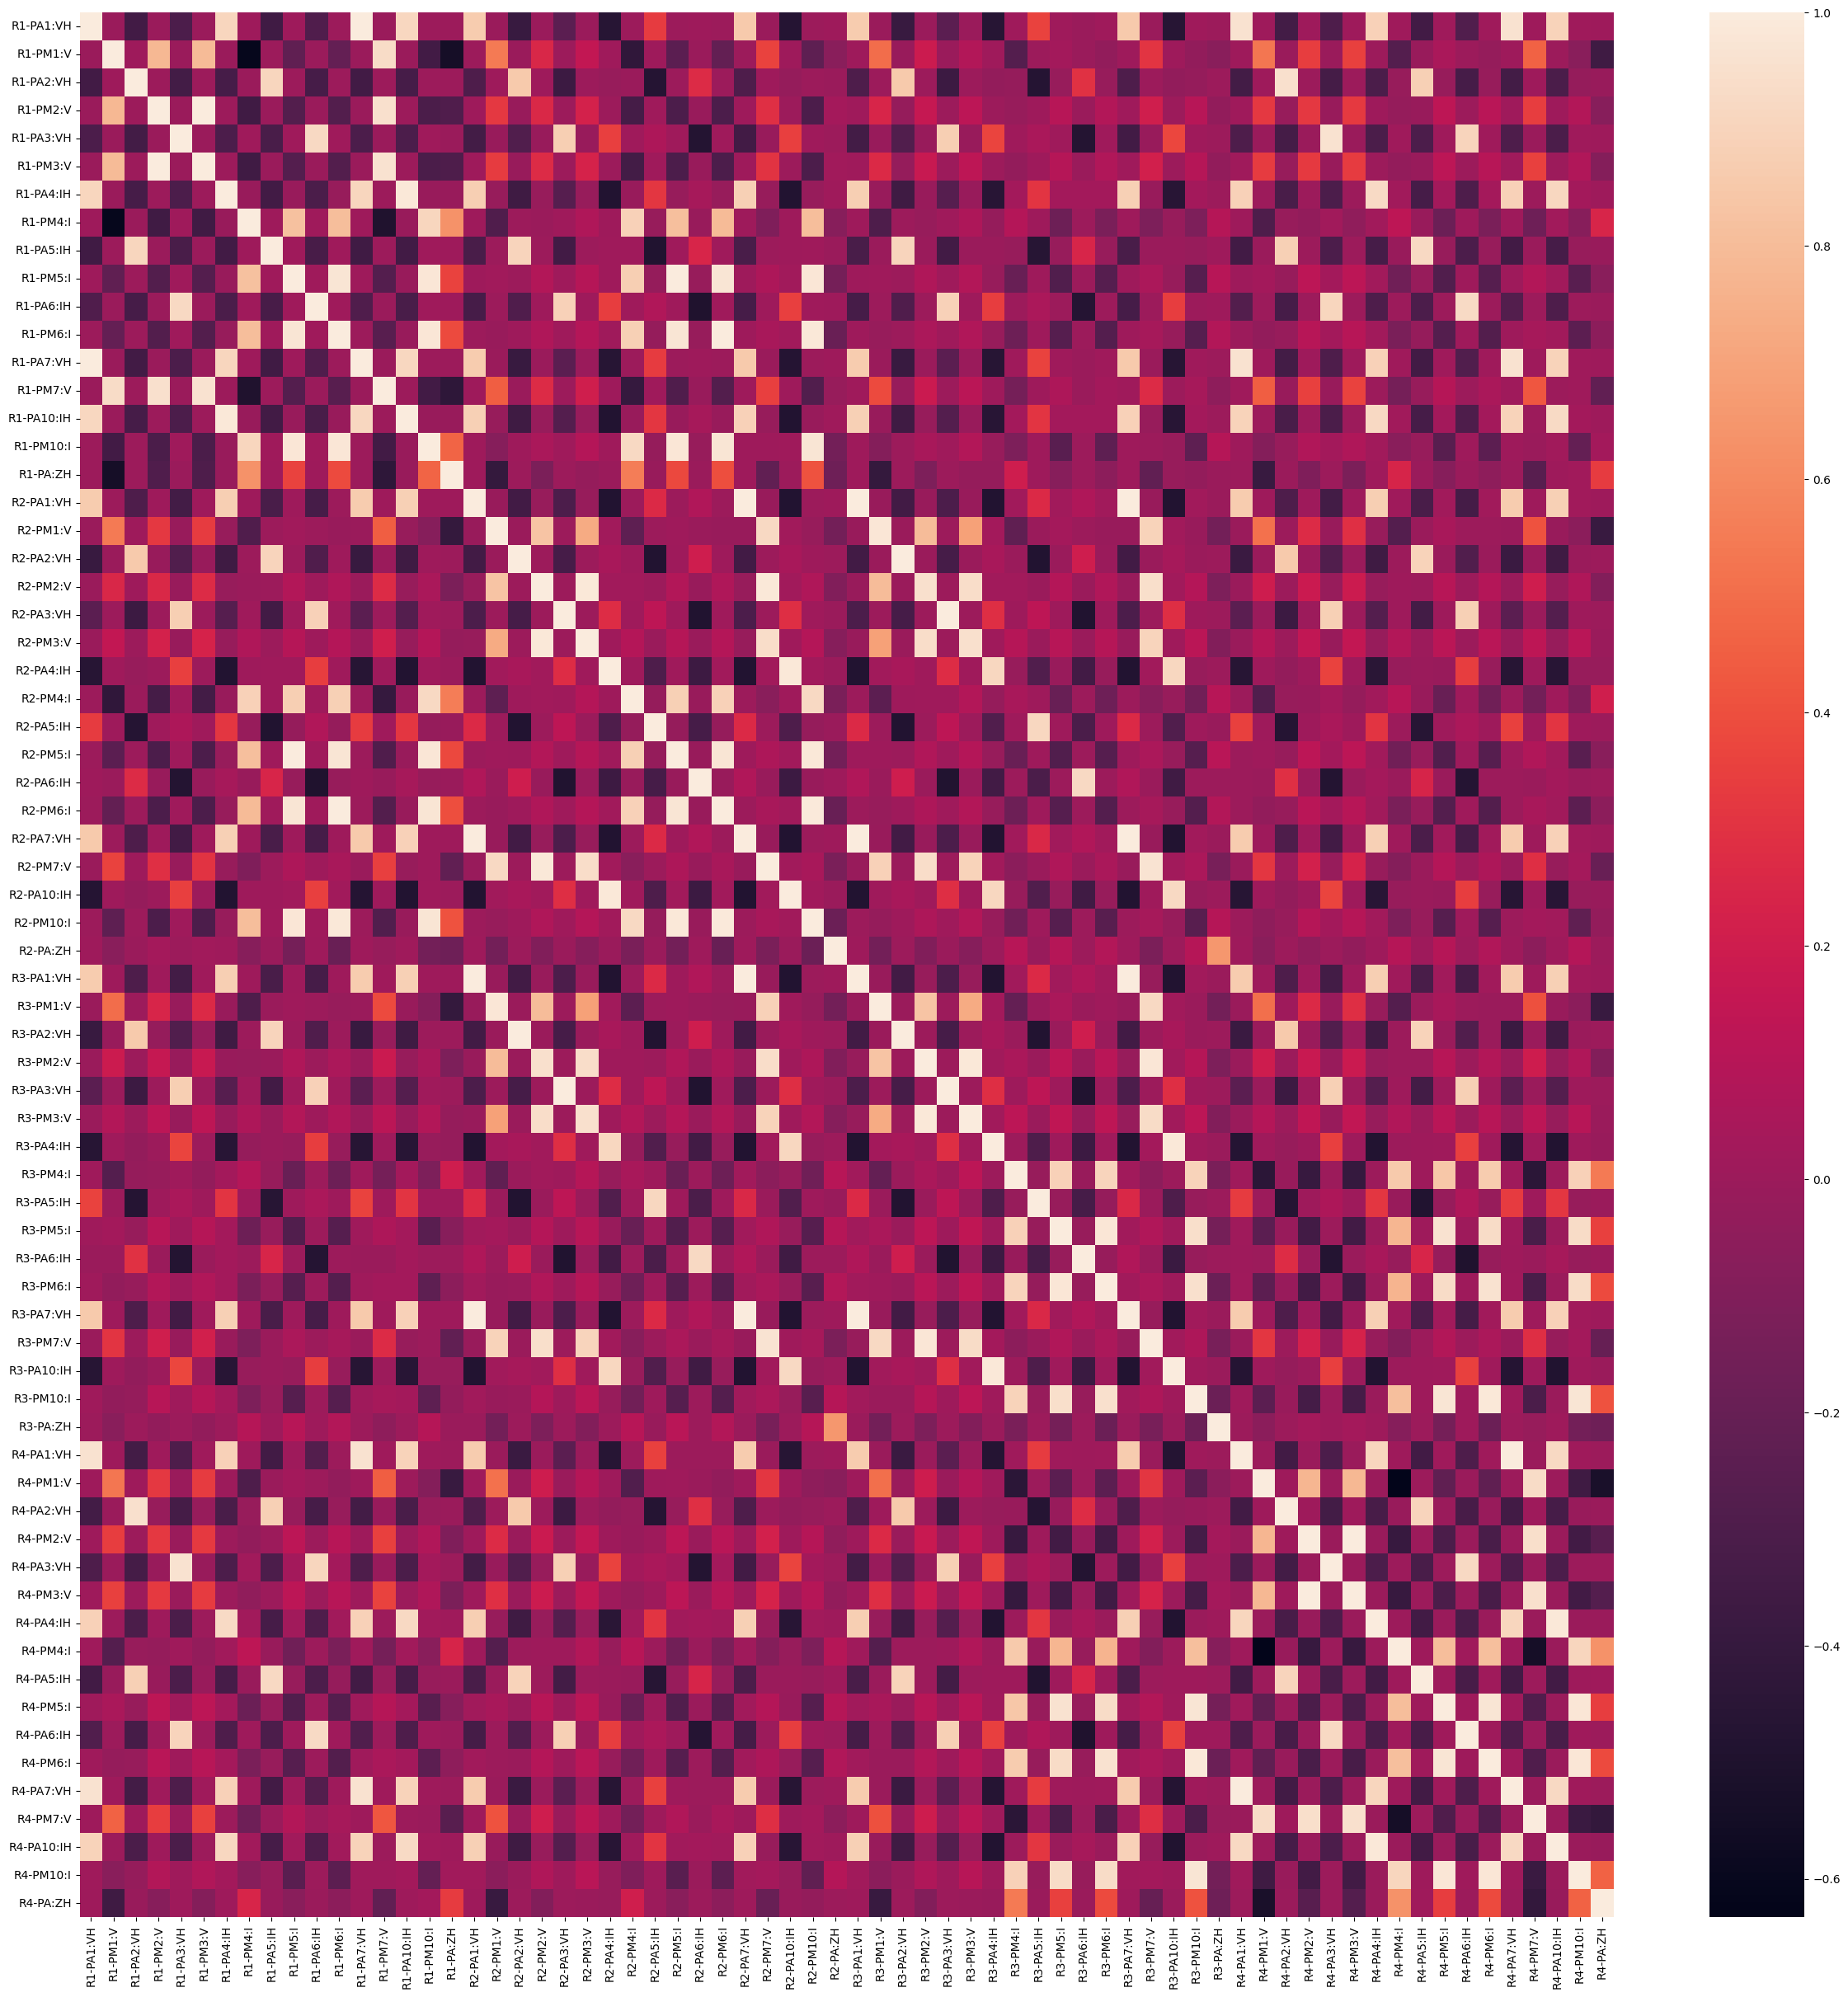

In [10]:
cols = sfm.get_feature_names_out()
feature_vector_1 =pd.DataFrame(feature_vector_1)
feature_vector_1.columns = cols
feature_vector_1



corr = pd.DataFrame(feature_vector_1).corr()

plt.figure(figsize=(30,30))

sns.heatmap(corr)

plt.show()

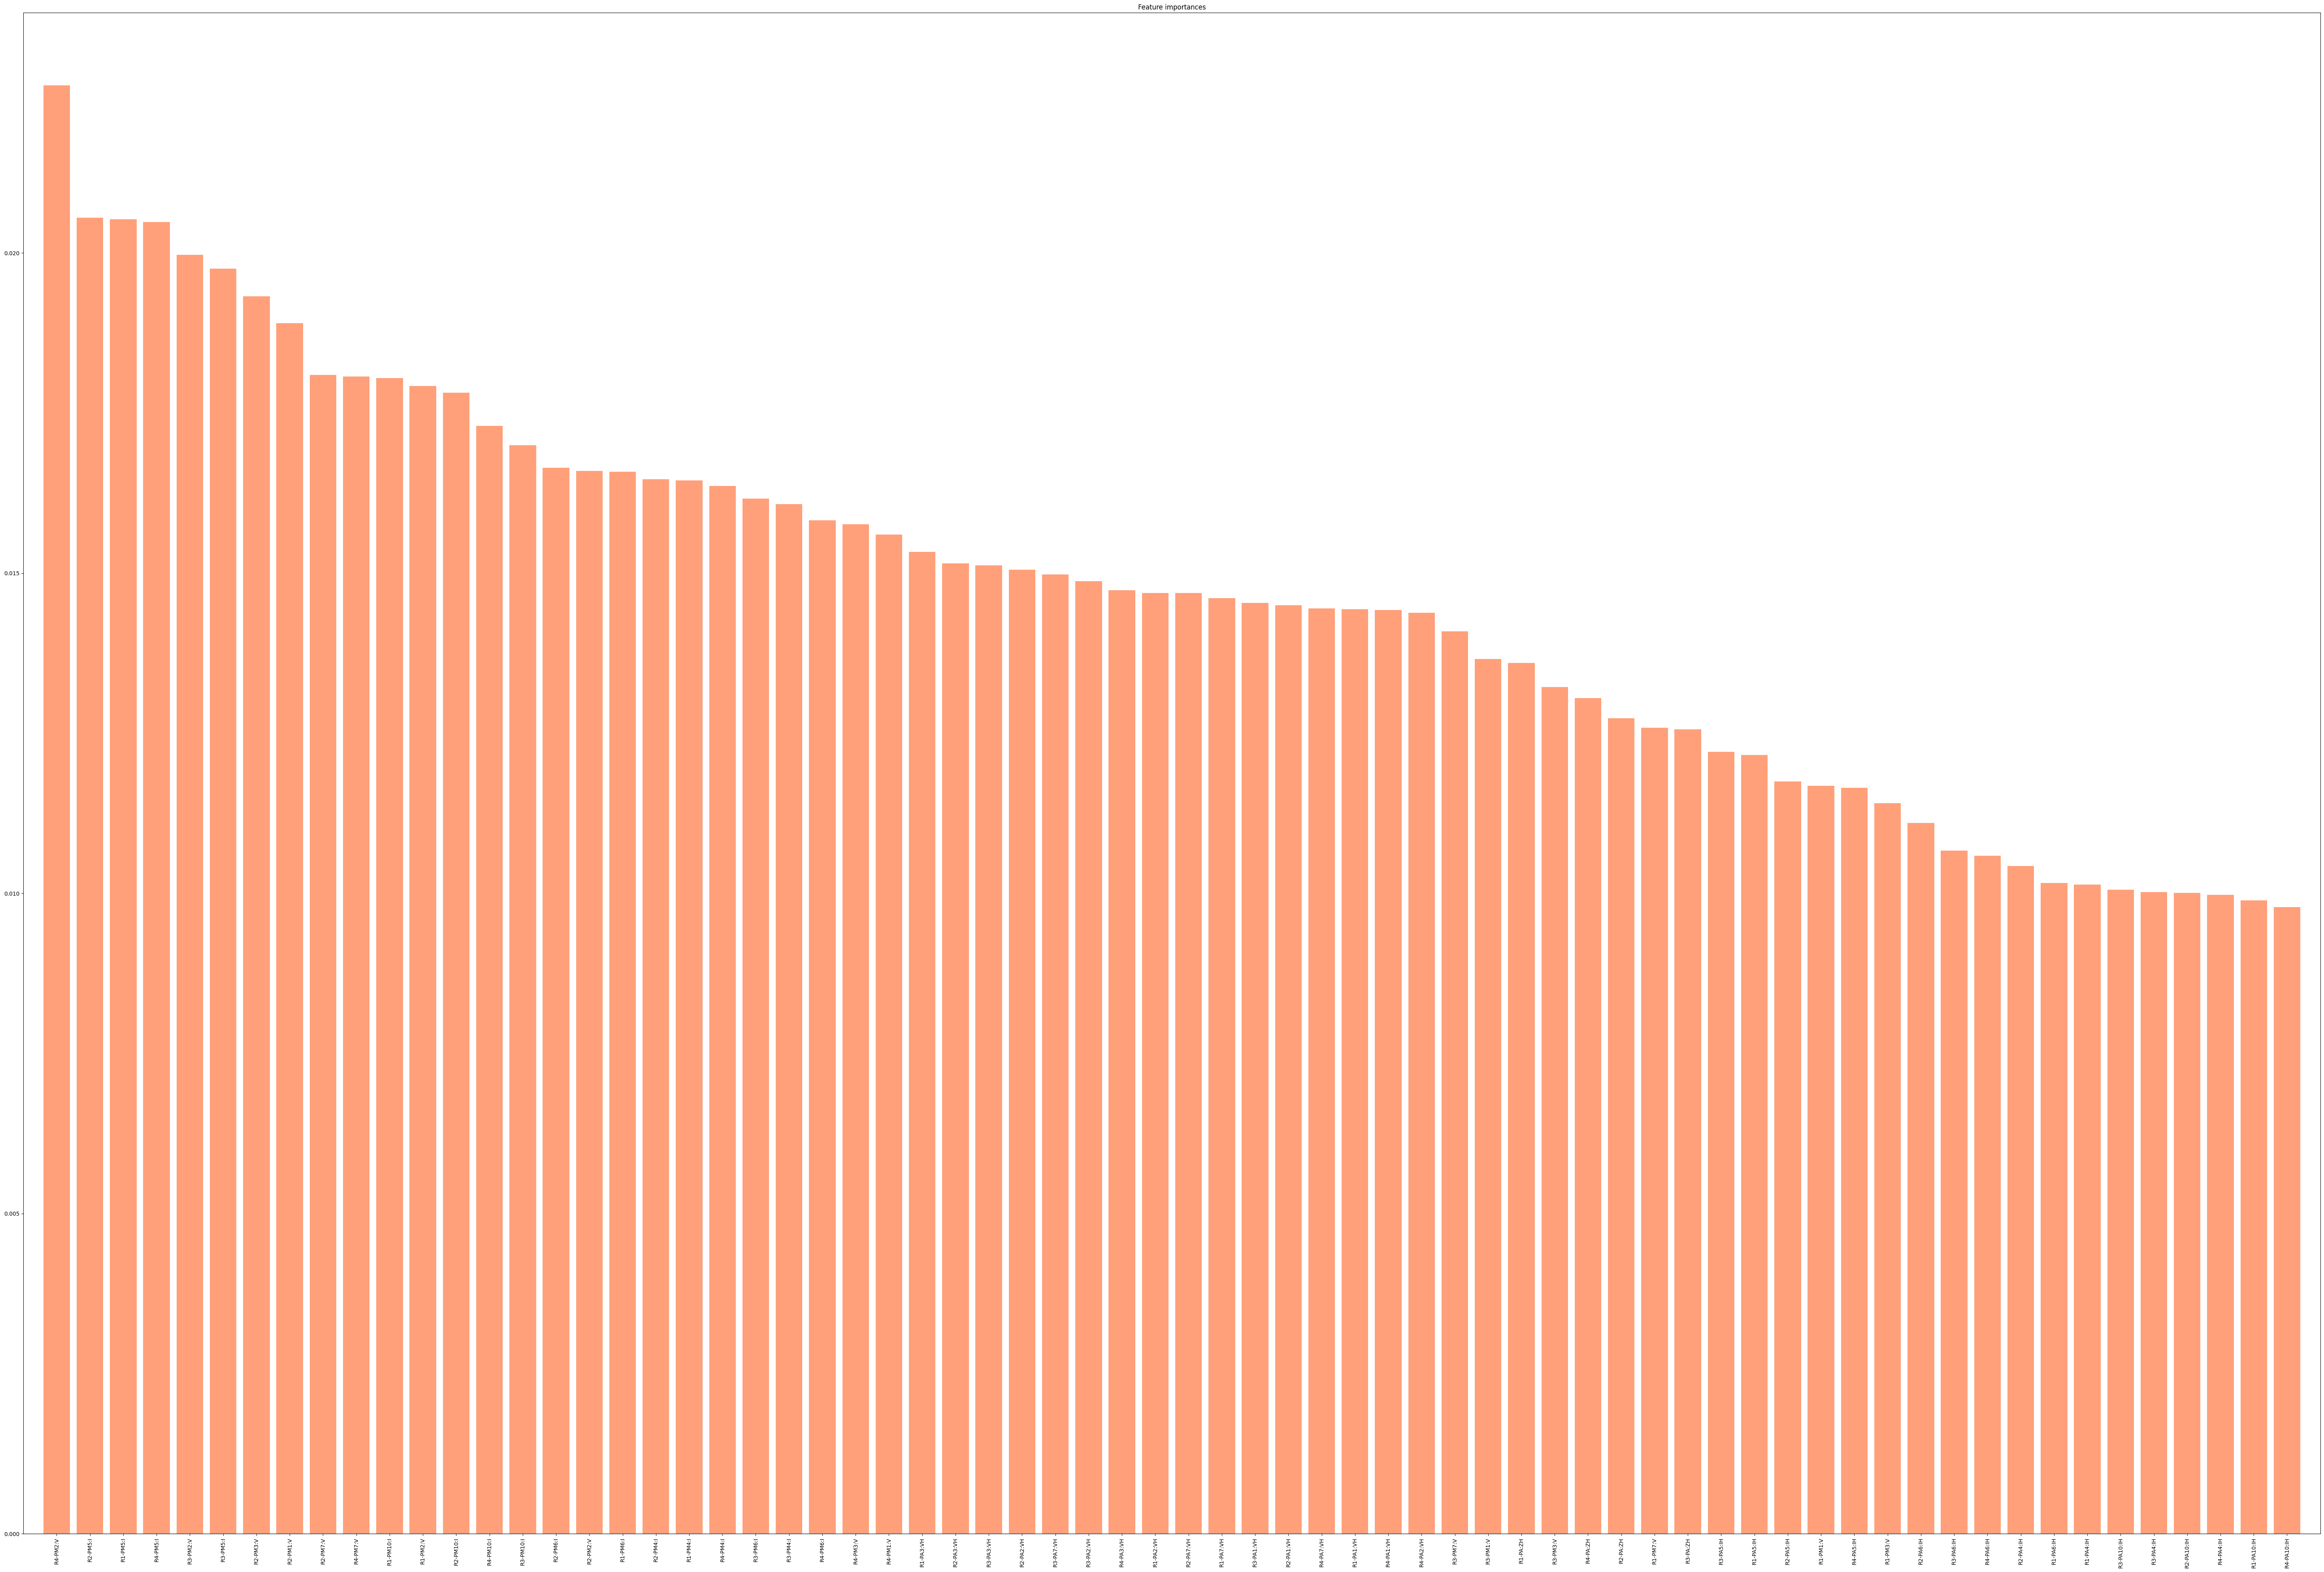

In [11]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(feature_vector_1, data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(feature_vector_1.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(feature_vector_1.shape[1]), feature_vector_1.columns[indices], rotation=90)
plt.xlim([-1, feature_vector_1.shape[1]])
plt.show()

In [12]:
numerical_cols = feature_vector_1.select_dtypes(include=['float64', 'int64']).columns


scaler = RobustScaler()

# Normalize the numerical columns
feature_vector_1[numerical_cols] = scaler.fit_transform(feature_vector_1[numerical_cols])
feature_vector_1
# # Display the normalized DataFrame
# print(data)


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA10:IH,R4-PM10:I,R4-PA:ZH
0,-0.439733,3.600000,0.622838,3.782609,0.023617,3.600000,-0.492386,1.192961,0.654712,1.377312,...,1.197742,0.656550,1.377083,0.060731,1.170718,-0.440460,3.126699,-0.501465,1.240068,-0.055515
1,-0.483595,-1.333333,0.587136,-1.043478,-0.024135,-1.355556,-0.546326,1.362864,0.611072,1.545006,...,1.374070,0.612550,1.545352,-0.000002,1.349323,-0.484402,-1.531873,-0.555776,1.414459,0.288773
2,-0.499269,-3.400000,0.574406,-3.065217,-0.041199,-3.422222,-0.568975,1.475728,0.597319,1.618989,...,1.476929,0.598860,1.617114,-0.024479,1.455751,-0.500128,-3.504421,-0.575938,1.509023,0.556930
3,-0.504913,-3.355556,0.569756,-3.043478,-0.047418,-3.377778,-0.579672,1.523058,0.591893,1.626387,...,1.522235,0.593610,1.618351,-0.036219,1.498568,-0.505880,-3.462452,-0.585043,1.539726,0.755187
4,-0.480432,-0.600000,0.589655,-0.326087,-0.020766,-0.622222,-0.539183,0.708738,0.627524,0.765721,...,0.704267,0.629547,0.759685,0.007671,0.696069,-0.481339,-0.860367,-0.543603,0.714438,0.230224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,0.551222,-0.422222,-0.309468,-0.152174,-1.223431,-0.422222,0.516429,0.416262,-0.309395,0.398274,...,0.411610,-0.306783,0.408300,-1.247425,0.436725,0.551565,-0.650521,0.513778,0.413551,0.296841
78373,0.550882,-0.400000,-0.309772,-0.152174,-1.223765,-0.400000,0.515558,0.417476,-0.310121,0.400740,...,0.416508,-0.307247,0.405825,-1.248653,0.437949,0.551191,-0.650521,0.512767,0.414779,0.346233
78374,0.550474,-0.400000,-0.310132,-0.130435,-1.224283,-0.400000,0.514025,0.419903,-0.311252,0.405672,...,0.420182,-0.308204,0.409537,-1.249727,0.446512,0.550680,-0.650521,0.511476,0.419692,0.387553
78375,0.550372,-0.400000,-0.310187,-0.130435,-1.224357,-0.400000,0.514060,0.425971,-0.311455,0.409371,...,0.421406,-0.308465,0.409537,-1.249842,0.441619,0.550646,-0.650521,0.511372,0.418464,0.394127


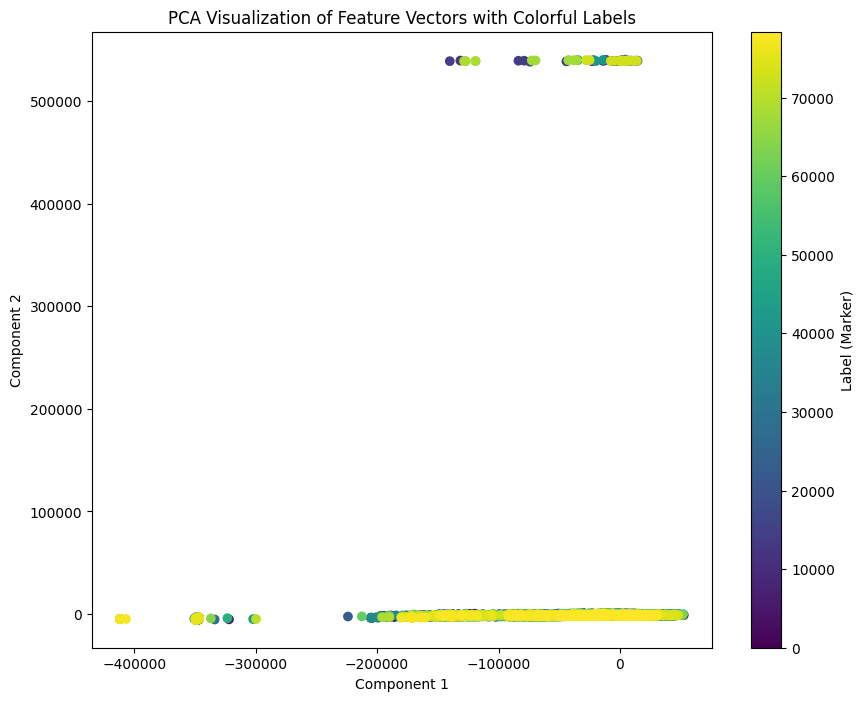

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


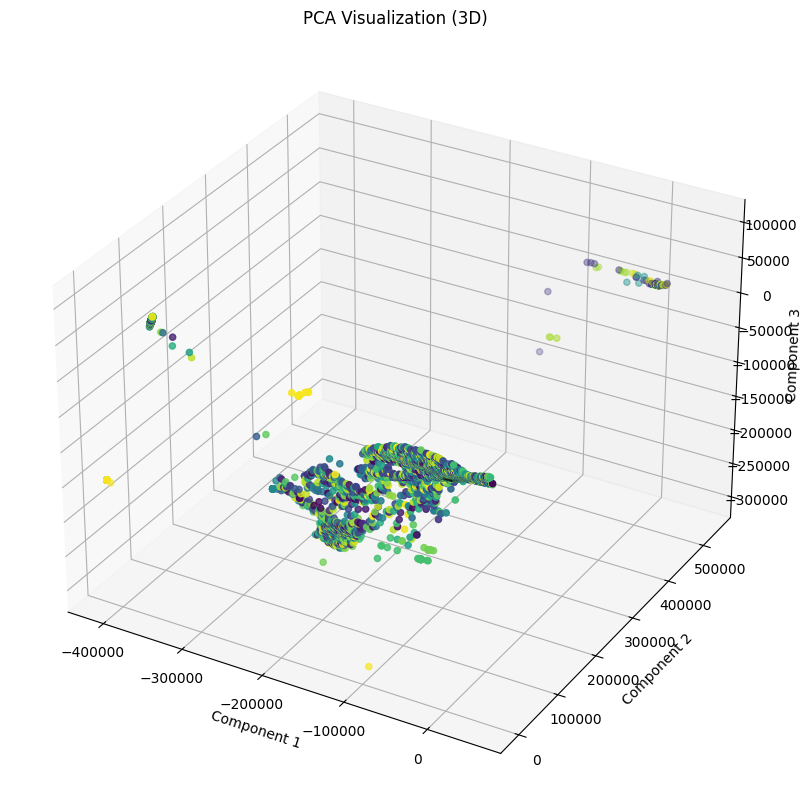

In [14]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [15]:
# Assuming the target variable is in a column named 'target'
# X = data.drop('marker', axis=1)
X = feature_vector_1
y = data['marker']
# y.value_counts()
# #import LabelEncoder
# #le = LabelEncoder()
# #y_encoded = le.fit_transform(y)

In [16]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 30 mins
H2O_cluster_timezone:,Asia/Riyadh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_danish_iwct2g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.735 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,24
H2O_cluster_status:,"locked, healthy"


In [17]:

# Assuming 'X' is your H2OFrame feature matrix and 'y' is your H2OFrame target variable
# Replace 'attacks' and 'neutral' with the actual class labels in your dataset
# Note: Convert your pandas DataFrame to H2OFrame using h2o.H2OFrame() if needed

# Combine features and target into a single H2OFrame
data = h2o.H2OFrame(pd.concat([X, y], axis=1))
data


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA10:IH,R1-PM10:I,R1-PA:ZH,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA10:IH,R2-PM10:I,R2-PA:ZH,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA10:IH,R3-PM10:I,R3-PA:ZH,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA10:IH,R4-PM10:I,R4-PA:ZH,marker
-0.439733,3.6,0.622838,3.78261,0.0236165,3.6,-0.492386,1.19296,0.654712,1.37731,0.0638109,1.15713,-0.439778,3.75,-0.499023,1.23199,-0.00522151,-0.47974,1.57061,0.577671,1.54659,-0.0105027,1.6097,0.267974,1.1899,-0.332037,1.37716,-0.822687,1.16363,-0.479325,1.58394,0.260603,1.24656,77.8042,-0.479782,1.44578,0.577601,1.52439,-0.0103446,1.43902,0.270683,1.20681,-0.331756,1.38642,-0.82928,1.1827,-0.479369,1.4878,0.263509,1.25799,80.9261,-0.440437,3.35113,0.623789,2.68436,0.020878,3.31534,-0.49409,1.19774,0.65655,1.37708,0.0607312,1.17072,-0.44046,3.1267,-0.501465,1.24007,-0.0555153,Natural
-0.483595,-1.33333,0.587136,-1.04348,-0.0241347,-1.35556,-0.546326,1.36286,0.611072,1.54501,0.0027811,1.34105,-0.483644,-1.27273,-0.552811,1.40781,0.251046,-0.527589,-1.25579,0.53712,-1.30671,-0.0646574,-1.26041,0.217515,1.3658,-0.386497,1.55104,-0.865764,1.34527,-0.527149,-1.26909,0.210714,1.42549,77.8835,-0.527472,-1.40964,0.537013,-1.36585,-0.0644634,-1.45122,0.220546,1.37956,-0.386074,1.55432,-0.8723,1.36054,-0.527145,-1.40244,0.213748,1.43243,80.9953,-0.484416,-1.5332,0.588006,-1.55309,-0.026882,-1.54861,-0.549054,1.37407,0.61255,1.54535,-1.72989e-06,1.34932,-0.484402,-1.53187,-0.555776,1.41446,0.288773,Natural
-0.499269,-3.4,0.574406,-3.06522,-0.0411993,-3.42222,-0.568975,1.47573,0.597319,1.61899,-0.0229827,1.4592,-0.49932,-3.40909,-0.573531,1.51038,0.530073,-0.545266,-2.45817,0.522102,-2.51583,-0.0846782,-2.47125,0.196892,1.48018,-0.403206,1.61899,0.927063,1.46497,-0.54485,-2.47854,0.19192,1.52823,78.0323,-0.545171,-2.61446,0.522003,-2.59756,-0.084506,-2.68293,0.199659,1.49148,-0.403154,1.6284,0.931352,1.47503,-0.544838,-2.63415,0.194802,1.5344,81.1889,-0.500176,-3.57016,0.575248,-3.33627,-0.0439232,-3.57708,-0.571033,1.47693,0.59886,1.61711,-0.0244791,1.45575,-0.500128,-3.50442,-0.575938,1.50902,0.55693,Natural
-0.504913,-3.35556,0.569756,-3.04348,-0.0474181,-3.37778,-0.579672,1.52306,0.591893,1.62639,-0.0346865,1.50305,-0.505033,-3.36364,-0.582671,1.54335,0.734591,-0.550933,-2.44201,0.51735,-2.49751,-0.0910965,-2.4624,0.187843,1.5126,-0.410541,1.63145,0.918249,1.51546,-0.550482,-2.46331,0.183326,1.56074,78.1232,-0.550913,-2.60241,0.517161,-2.57317,-0.0908572,-2.65854,0.190239,1.52433,-0.409925,1.6321,0.922887,1.51279,-0.550512,-2.60976,0.186389,1.55897,-1.14053,-0.505895,-3.54826,0.570626,-3.29792,-0.0501705,-3.53345,-0.581657,1.52224,0.59361,1.61835,-0.036219,1.49857,-0.50588,-3.46245,-0.585043,1.53973,0.755187,Natural
-0.480432,-0.6,0.589655,-0.326087,-0.0207662,-0.622222,-0.539183,0.708738,0.627524,0.765721,0.00981112,0.695493,-0.480584,-0.522727,-0.541475,0.716728,0.261451,-0.514033,-0.457543,0.548671,-0.501233,-0.0493044,-0.450096,0.217351,0.703782,-0.373938,0.766463,-0.867035,0.707132,-0.5136,-0.463742,0.214093,0.727835,-0.886528,-0.513971,-0.60241,0.54852,-0.54878,-0.0489846,-0.634146,0.220683,0.709246,-0.373495,0.765432,-0.873228,0.707674,-0.513581,-0.585366,0.217373,0.727273,-0.877321,-0.481284,-0.810405,0.590524,-0.920351,-0.0235181,-0.828835,-0.540695,0.704267,0.629547,0.759685,0.00767142,0.696069,-0.481339,-0.860367,-0.543603,0.714438,0.230224,Natural
-0.480228,-0.6,0.589876,-0.347826,-0.0205071,-0.622222,-0.543434,0.739078,0.626857,0.771887,0.00378539,0.736906,-0.480311,-0.545454,-0.544963,0.74359,0.392573,-0.513743,-0.459238,0.548862,-0.502969,-0.0490127,-0.459958,0.212761,0.7

In [18]:

# Identify predictor and response variables
predictors = X.columns.tolist()
response = 'marker'  # Replace with the actual name of your target column


In [19]:

# Split the data into training and testing sets
train, test = data.split_frame(ratios=[0.8], seed=42)
train.shape

(62647, 69)

In [20]:

# Initialize and train AutoML
aml = H2OAutoML(max_models=50, seed=42, preprocessing=None ,include_algos = ["XGBoost", "DeepLearning", "DRF","GLM", "GBM", "StackedEnsemble"])
aml.train(x=predictors, y=response, training_frame=train)

# Get the best model from AutoML
best_model = aml.leader


# Save the best model to disk
model_path = '/home/danish/Codes/AutoML/H2o_Dataset_1_FE'
h2o.save_model(model=best_model, path=model_path, force=True)



# Load the saved model 
# best_model = h2o.load_model('/home/danish/Codes/AutoML/H2o/ICS_Dataset_1_With_Feature_Eng/StackedEnsemble_AllModels_1_AutoML_8_20240513_165602')

best_model

AutoML progress: |███████████████████████████████████████████████████████████████

In [ ]:


# Make predictions on the test set
# predictions = best_model.predict(test)


In [ ]:

# Optionally, you can evaluate the performance
test_metrics = best_model.model_performance(test)
print(test_metrics)


In [ ]:
best_model.learning_curve_plot()

In [ ]:
predictions = best_model.predict(test)

y_true = test['marker']
y_pred = predictions['predict']

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train['marker'].as_data_frame())
y_true_ = label_binarizer.transform(test['marker'].as_data_frame())
y_pred_ = label_binarizer.transform(y_pred.as_data_frame())


print(y_true_.shape)
print(y_pred_.shape)# (n_samples, n_classes)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_true_ = le.fit_transform(y_true_)
# y_pred_ = le.fit_transform(y_pred_)


# print(y_true_)
# print(y_pred_)

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

# Example data
classes=np.unique(train['marker'].as_data_frame())



# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true_, y_pred_)

# Normalize confusion matrix
cnf_matrix_norm = normalize(cnf_matrix, axis=1, norm='l1')

# Plot confusion matrix with percentages
plt.figure(figsize=(30, 24))
sns.heatmap(cnf_matrix_norm, annot=True, cmap='Reds', fmt='.1%', xticklabels=classes, yticklabels=classes)
plt.title('Normalized Confusion Matrix with Percentages')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Compute classification report
class_report = classification_report(y_true_, y_pred_)
print("Classification Report:")
print(class_report)


In [ ]:
# # Save the best model to disk
# model_path = '/home/danish/Codes/AutoML/H2o/ICS_Dataset_1_With_Feature_Eng'
# h2o.save_model(model=best_model, path=model_path, force=True)




# # Load the saved model 
# best_model = h2o.load_model('/home/danish/Codes/AutoML/H2o/StackedEnsemble_AllModels_1_AutoML_8_20240512_120210')

In [ ]:
from pycm import ConfusionMatrix

y_true = y_true['marker'].as_data_frame()
y_true = y_true['marker'].tolist()

y_pred = y_pred['predict'].as_data_frame()
y_pred = y_pred['predict'].tolist()


# Calculate and print PyCM metrics
pycm_obj = ConfusionMatrix(actual_vector=y_true, predict_vector=y_pred)
print(pycm_obj)

# Get detailed PyCM report
pycm_report = pycm_obj.overall_stat
print(pycm_report)

In [ ]:
h2o.cluster().shutdown()